<a href="https://colab.research.google.com/github/Tharun-Anand/SummerSchool-Assignment/blob/main/ED20B068_Ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

Question 1

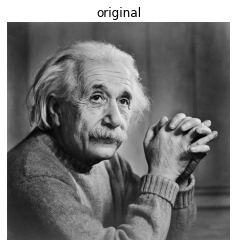

In [ ]:
import cv2
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(img,cmap='gray'),plt.title("original"),plt.axis("off")
plt.show()

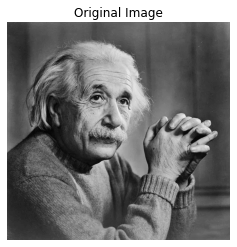

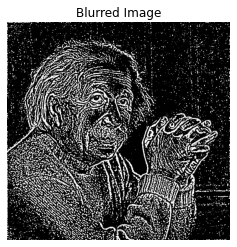

In [ ]:
blur_gaus = cv2.GaussianBlur(img,(9,9),0,0)
blur_gaus1 = cv2.GaussianBlur(img,(5,5),0,0)
plt.figure(),plt.axis("off"),plt.title("Original Image"),plt.imshow(img,cmap='gray')
plt.figure(),plt.axis("off"),plt.title("Blurred Image"),plt.imshow(blur_gaus-blur_gaus1,cmap='gray')
plt.show()

Question 2

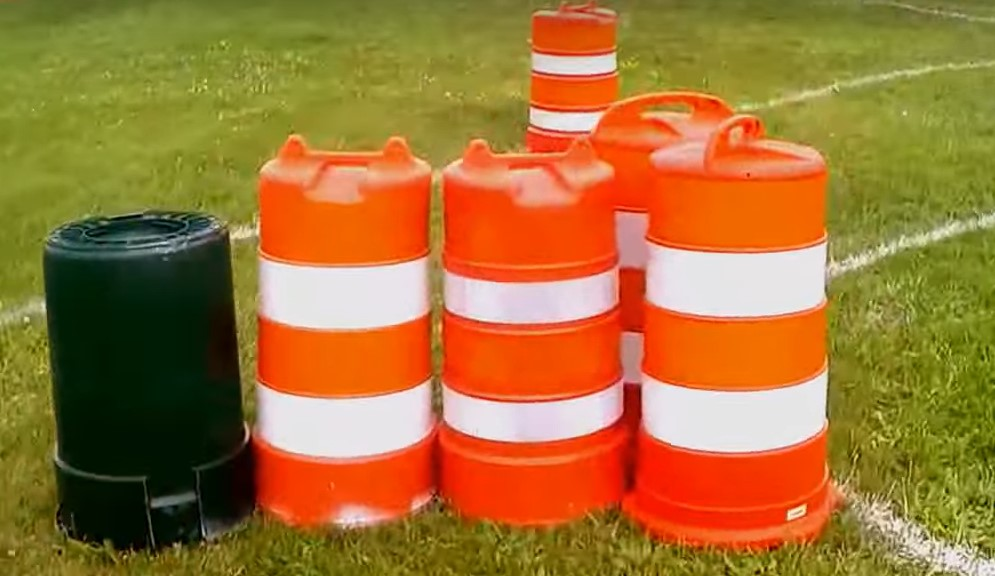

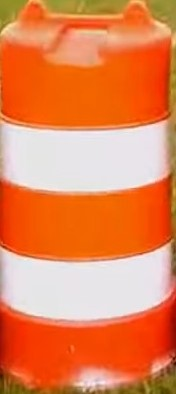

In [ ]:
roi = cv2.imread('roi.jpg',1)
orig=cv2.imread('original.jpg',1)
cv2_imshow(orig)
cv2_imshow(roi)

In [ ]:
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
hsv_orig = cv2.cvtColor(orig, cv2.COLOR_BGR2HSV)


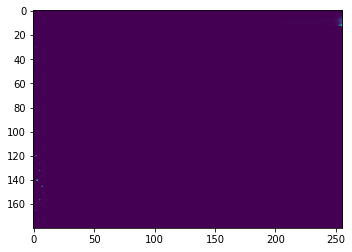

In [ ]:
roi_hist=cv2.calcHist([hsv_roi],[0,1],None,[180,256],[0,180,0,256])
plt.imshow(roi_hist)
plt.show()

In [ ]:
  cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
res = cv2.calcBackProject([hsv_orig],[0,1],roi_hist,[0,180,0,256],1)

In [ ]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(res,-1,disc)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 45, 40, 35],
       [ 0,  0,  0, ..., 36, 27, 18],
       [ 0,  0,  0, ..., 38, 32, 30]], dtype=uint8)

In [ ]:
ret,thresh = cv2.threshold(res,10,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
fin = cv2.bitwise_and(orig,thresh)

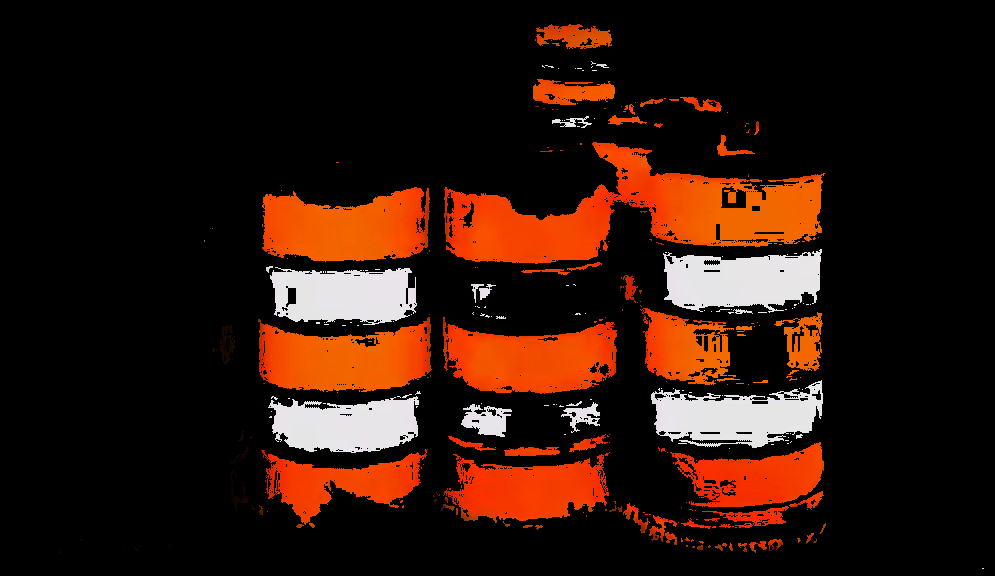

In [ ]:
cv2_imshow(fin)